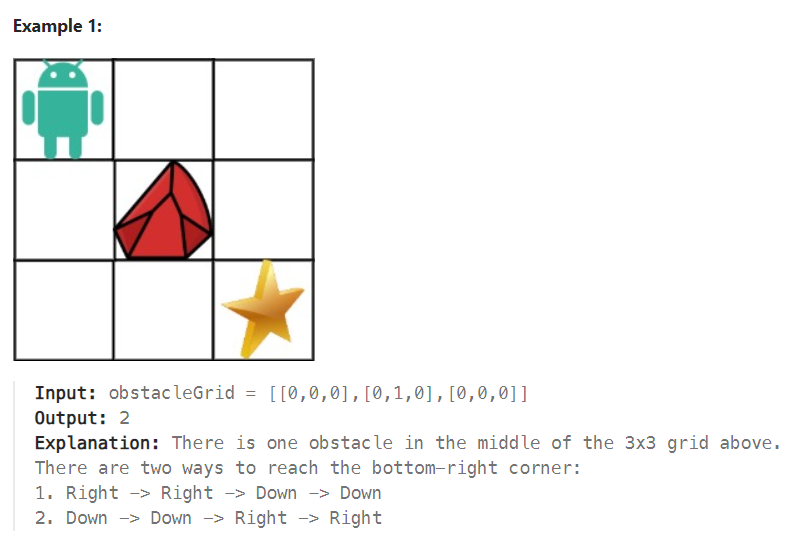

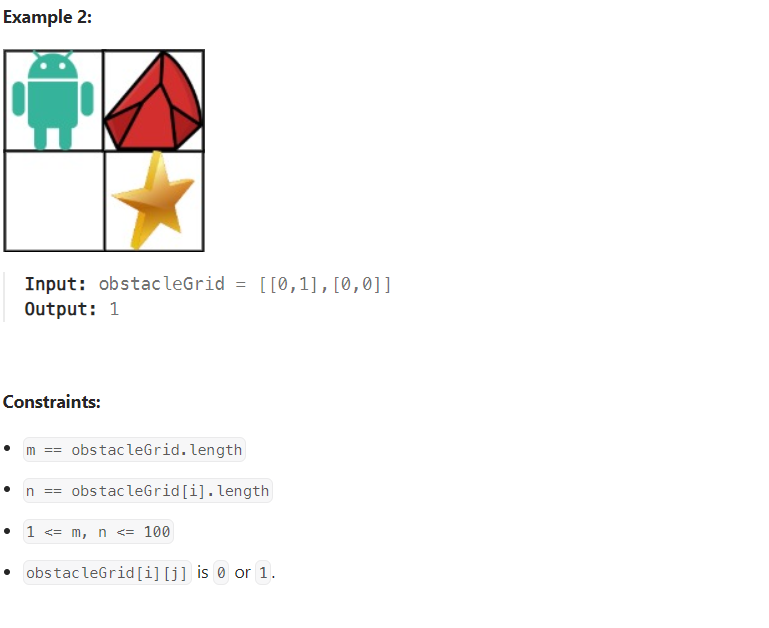

## Top down 

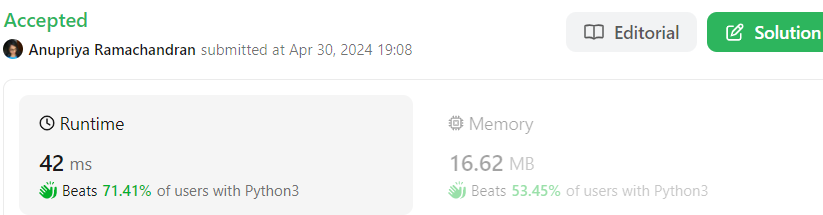

In [2]:
from typing import List

import math
class Solution:
    def uniquePathsWithObstacles(self, obstacleGrid: List[List[int]]) -> int:
        if obstacleGrid[-1][-1] == 1:
            return 0
        rows = len(obstacleGrid)
        cols = len(obstacleGrid[0]) 
        dp = [[-1 for _ in range(cols)] for _ in range(rows)]
        return self.helper(dp, obstacleGrid, 0, 0)

    def helper(self, dp,  grid, r, c):
        rows = len(grid)
        cols = len(grid[0])

        if r == rows - 1 and c == cols - 1:
            return 1

        if r < 0 or r >= rows or c < 0 or c >= cols:
            return 0

        # obstacle condition
        if grid[r][c] == 1:
            return 0
            
        if dp[r][c] == -1:
            moveright = self.helper(dp, grid, r, c + 1)
            movedown = self.helper(dp, grid, r + 1, c)
            dp[r][c] = moveright + movedown
        return dp[r][c]

Bottom up Approach

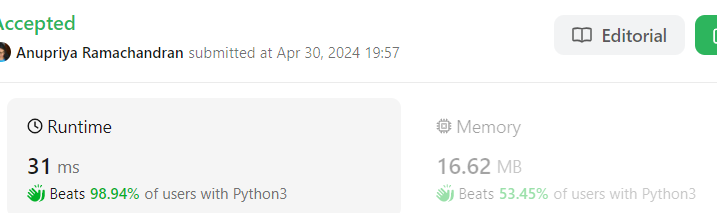

In [15]:
import math

class Solution:
    def uniquePathsWithObstacles(self, obstacleGrid: List[List[int]]) -> int:
        if obstacleGrid[-1][-1] == 1 or obstacleGrid[0][0] == 1:
            return 0

        rows = len(obstacleGrid)
        cols = len(obstacleGrid[0]) 

        dp = [[0 for _ in range(cols + 1)] for _ in range(rows + 1)]

        dp[0][1] = 1 

        for i in range(1, rows + 1):
            for j in range(1, cols + 1):
                if not obstacleGrid[i-1][j-1]:
                    moveright = dp[i][j-1]
                    movedown = dp[i-1][j]
                    dp[i][j] = moveright + movedown
        return dp[-1][-1]  